In [7]:
from pathlib import Path
from dataclasses import dataclass
import sys
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2


@dataclass
class Config:
    REPO_ROOT: Path = Path("../../")
    data_dir: Path = REPO_ROOT / "data"


config = Config()

sys.path.append(str(config.REPO_ROOT))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from python.src.preprocess import (
    preprocess_rfcc,
)

df_rfcc = pd.read_csv(config.data_dir / "risk_factors_cervical_cancer.csv")
df_rfcc_preprocessed = preprocess_rfcc(df=df_rfcc)
assert df_rfcc.shape[0] == df_rfcc_preprocessed.shape[0]

In [11]:
X = df_rfcc_preprocessed.drop("Biopsy", axis=1)
y = df_rfcc_preprocessed["Biopsy"].map({"Healthy": 0, "Cancer": 1})

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

explainer = shap.TreeExplainer(
    model, X, feature_perturbation="interventional", model_output="probability"
)
shap_values = explainer.shap_values(X)

In [47]:
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

explainer = shap.TreeExplainer(
    model, data=X, model_output="probability"
)  # data=X を追加
shap_values = explainer.shap_values(X)

In [48]:
i = 18
shap.force_plot(
    explainer.expected_value[1],
    shap_values[i][:, 1],
    X.iloc[i, :],
)

In [49]:
i = 6
shap.force_plot(
    explainer.expected_value[1],
    shap_values[i][:, 1],
    X.iloc[i, :],
)

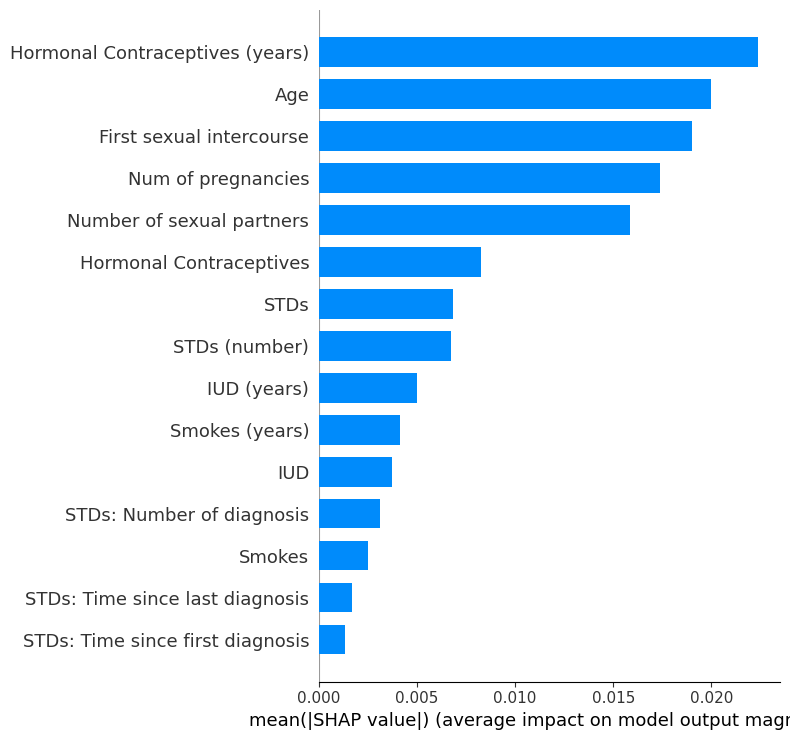

In [91]:
# Plot feature importance
shap.summary_plot(shap_values[:, :, 1], X, plot_type="bar")

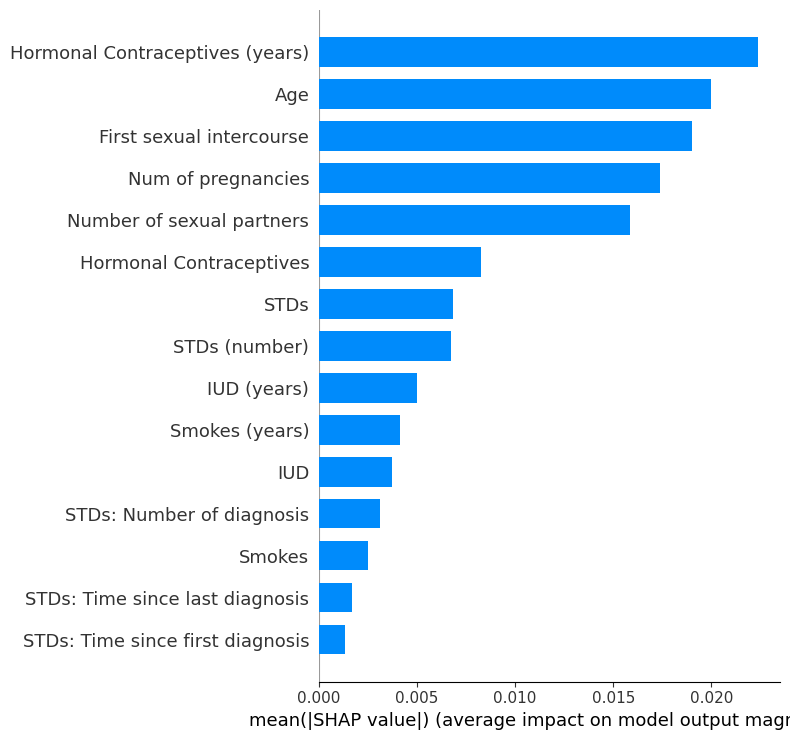

In [92]:
# Plot feature importance
shap.summary_plot(shap_values[:, :, 0], X, plot_type="bar")

In [99]:
cmap = plt.get_cmap("viridis", 40)
newcolors = [cmap(0.0), cmap(0.8), cmap(0.8)]
cmap2 = ListedColormap(newcolors)

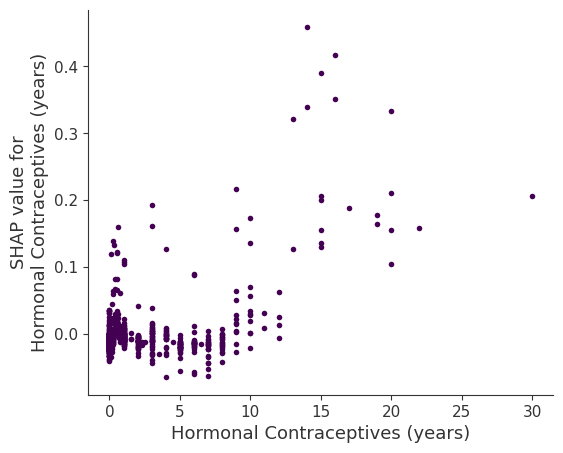

In [102]:
shap.dependence_plot(
    "Hormonal Contraceptives (years)",  # もしくは　feature_index,
    shap_values[:, :, 1],  # 抽出したSHAP値を使用
    X,
    interaction_index=None,
    color=cmap2.colors[0],
)

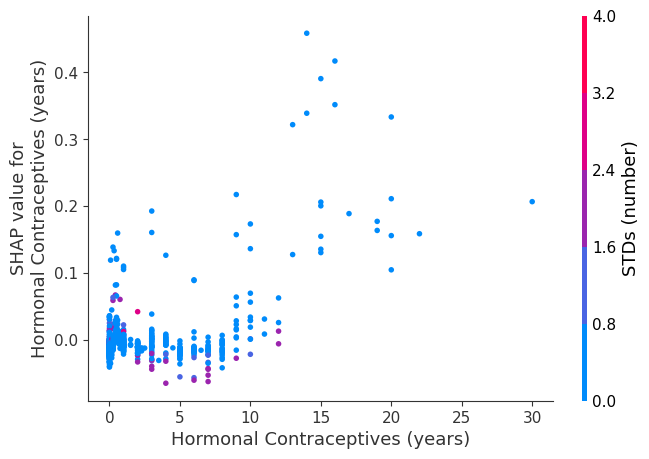

In [104]:
shap.dependence_plot(
    "Hormonal Contraceptives (years)",  # もしくは　feature_index,
    shap_values[:, :, 1],  # 抽出したSHAP値を使用
    X,
    color=cmap2.colors[0],
)